In [1]:
import xarray as xr
import pyproj
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cmocean as cmo
import glob
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import numpy as np
import copy
import sys

sys.path.append('../src')
import utils as ut

In [2]:
ds = xr.open_dataset(f'../data/basinmask.nc')
lon = ds.lon
lat = ds.lat
mask = ds.mask
basin = ds.basin
ds.close()

In [3]:
mpl.rcParams['figure.subplot.wspace'] = .2
mpl.rcParams['figure.subplot.left'] = .1
mpl.rcParams['figure.subplot.right'] = .9
mpl.rcParams['figure.figsize'] = (7,7)

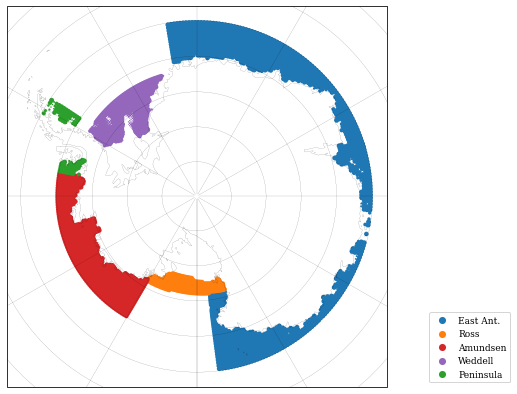

In [6]:
fig = plt.figure()

ax = fig.add_subplot(111,projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -80, -63], crs=ccrs.PlateCarree())
for b,bas in enumerate(basin.values):
    im = ax.scatter(lon,lat,25*np.nansum(mask[b,:,:,:],axis=0),c=ut.bcol[bas],transform=ccrs.PlateCarree(),label=bas,lw=0,alpha=1)
ax.coastlines(lw=.1)
ax.legend(bbox_to_anchor=(1.1,0),loc='lower left',markerscale=2)

gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=False,color='k',linewidth=.1)
gl.xlocator = mticker.FixedLocator(np.arange(-180,210,30))
gl.xformatter = LONGITUDE_FORMATTER

plt.savefig(f'../draftfigs/basinmap_eveline.png',dpi=450)
plt.show()